In [121]:
import numpy as np
import os
import pandas as pd

## Load Dataset: Beijing PM2.5

In [122]:
dataset_root = "../datasets/"
csvfile = os.path.join(dataset_root, "beijing_pm2.5", "PRSA_data_2010.1.1-2014.12.31.csv")
fields = ['year','month','day','DEWP','TEMP','PRES','Is','Ir'] # Specific columns to use.
df = pd.read_csv(csvfile, usecols=fields)
df.head()

,year,month,day,DEWP,TEMP,PRES,Is,Ir
0,2010,1,1,-21,-11.0,1021.0,0,0
1,2010,1,1,-21,-12.0,1020.0,0,0
2,2010,1,1,-21,-11.0,1019.0,0,0
3,2010,1,1,-21,-14.0,1019.0,0,0
4,2010,1,1,-20,-12.0,1018.0,0,0


In [123]:
# Create single date column from independent year/month/day columns.
df = df.assign(date=pd.to_datetime(df[['year','month','day']]))
df.head()

,year,month,day,DEWP,TEMP,PRES,Is,Ir,date
0,2010,1,1,-21,-11.0,1021.0,0,0,2010-01-01
1,2010,1,1,-21,-12.0,1020.0,0,0,2010-01-01
2,2010,1,1,-21,-11.0,1019.0,0,0,2010-01-01
3,2010,1,1,-21,-14.0,1019.0,0,0,2010-01-01
4,2010,1,1,-20,-12.0,1018.0,0,0,2010-01-01


## Feature Definitions

List of plants to grow, with scores that rate their performance in a given interval of time. Scores should be floating-point numbers within a range (possibly from `[0,10]`) for each plant. The score matrix should have columns that correspond to each plant, and rows that correspond to each time interval.

For example:
```python
features = ['tomato', 'sunflower', 'cucumber']
scores = [[3, 7, 10], [2, 1, 5], [7, 9, 11]]
```

**Note**: The scores should eventually be normalized between `[0,1]` to accommodate different input score ranges.

In [124]:
# Add feature scores to the dataset.
# These scores should be normalized between [0,1].
features = ['tomato', 'sunflower', 'cucumber']
df = df.assign(**{feat:np.random.uniform(0.0, 1.0, size=df.shape[0]) for feat in features})
df.head()

,year,month,day,DEWP,TEMP,PRES,Is,Ir,date,tomato,sunflower,cucumber
0,2010,1,1,-21,-11.0,1021.0,0,0,2010-01-01,0.186086,0.758977,0.418014
1,2010,1,1,-21,-12.0,1020.0,0,0,2010-01-01,0.306854,0.120514,0.767650
2,2010,1,1,-21,-11.0,1019.0,0,0,2010-01-01,0.169563,0.861682,0.253268
3,2010,1,1,-21,-14.0,1019.0,0,0,2010-01-01,0.184143,0.832592,0.166267
4,2010,1,1,-20,-12.0,1018.0,0,0,2010-01-01,0.499718,0.770801,0.240087


In [125]:
# Ensure rows are in time-sorted ascending order.
df = df.sort_values(['date'], ascending=[True])

## Data Visualization

In [126]:
import matplotlib.pyplot as plt

In [127]:
# Group records by month.
gdf = df.groupby(pd.Grouper(key='date', freq='M'))

Text(0.5, 1.0, 'Average Plant Score per Month')

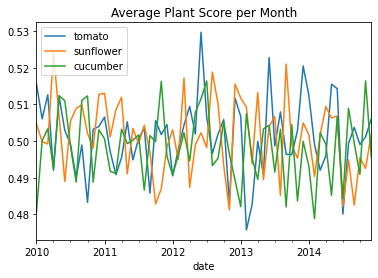

In [128]:
# Visualize average plant scores per month.
gdf.mean()[features].plot()
plt.title('Average Plant Score per Month')

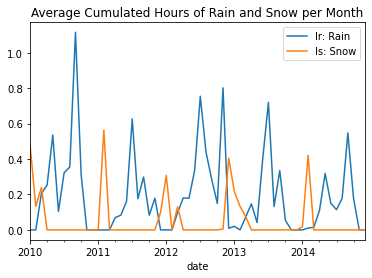

In [129]:
gdf.mean()[['Ir', 'Is']].plot()
plt.title('Average Cumulated Hours of Rain and Snow per Month')
plt.legend(['Ir: Rain', 'Is: Snow'])

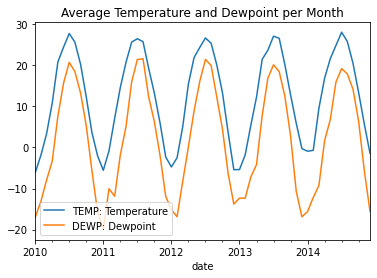

In [130]:
gdf.mean()[['TEMP', 'DEWP']].plot()
plt.title('Average Temperature and Dewpoint per Month')
plt.legend(['TEMP: Temperature', 'DEWP: Dewpoint'])

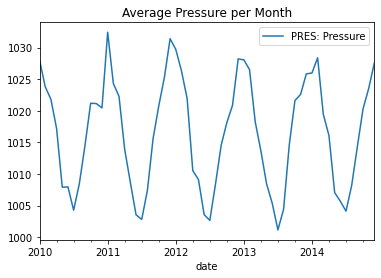

In [131]:
gdf.mean()[['PRES']].plot()
plt.title('Average Pressure per Month')
plt.legend(['PRES: Pressure'])